# Dengue Trend Over Time

### Data File Creation

This is synthetic data to test the program (Showing a seasonal trend). This can be replaced with real data collected from government website.

In [23]:
import pandas as pd
import numpy as np
import datetime

# Parameters for synthetic data
start_date = '2020-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start_date, end_date, freq='D')

# Initialize an empty list to store cases
cases = []

# Generate synthetic data with a seasonal increase from September to December
for date in date_range:
    if date.month in [5, 6]:  # May to June
        daily_cases = np.random.poisson(lam=20)  # Low
    elif date.month in [7, 8]:  # July to Augustr
        daily_cases = np.random.poisson(lam=25)  # Increasing
    elif date.month in [9, 10]:  # September to October
        daily_cases = np.random.poisson(lam=30)  # Increasing
    elif date.month in [11, 12]:  # November to December
        daily_cases = np.random.poisson(lam=35)  # Highest
    elif date.month in [1, 2]:  # January to February
        daily_cases = np.random.poisson(lam=25)  # Decreasing
    else:  # March to April
        daily_cases = np.random.poisson(lam=15)  # Lowest
   
    cases.append(daily_cases)

# Create DataFrame
data = pd.DataFrame({'Date': date_range, 'Cases': cases})
print(data)

# Save to CSV
file_path = 'synthetic-dengue-cases.csv'
data.to_csv(file_path, index=False)

print(f"CSV file generated: {file_path}")


           Date  Cases
0    2020-01-01     22
1    2020-01-02     24
2    2020-01-03     28
3    2020-01-04     20
4    2020-01-05     30
...         ...    ...
1456 2023-12-27     27
1457 2023-12-28     33
1458 2023-12-29     26
1459 2023-12-30     49
1460 2023-12-31     35

[1461 rows x 2 columns]
CSV file generated: synthetic-dengue-cases.csv


### Program to generate the line plot

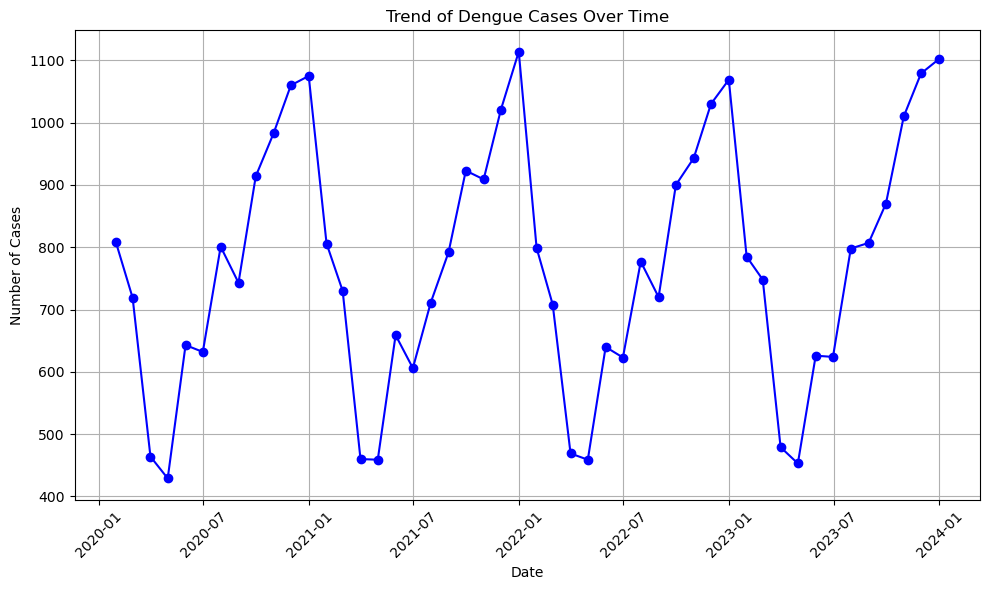

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Replace 'dengue_cases.csv' with your actual file path
df = pd.read_csv('synthetic-dengue-cases.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Resample the data to get monthly totals
monthly_cases = df.resample('M').sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_cases.index, monthly_cases['Cases'], marker='o', linestyle='-', color='b')

plt.title('Trend of Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
